# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 2*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 2
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to implement some functionalities on the dataset that you worked with in the first assignment.

### DEADLINE FOR THIS ASSIGNMENT IS 01 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import datetime as dt
import numpy as np
from scipy.signal import find_peaks
from functools import reduce

## Preparing data

### 1. Read 2020 and 2021 data for your selected country. You only need provincial data for this assignment. Print the first 5 lines of data

In [2]:
# Path to the province data of New Zealand
target_file = 'C:/Users/rohit/Documents/Rohit/TIL6010/Region_Mobility_Report_CSVs/processed data/NZ_province.csv'

# Read the province data of New Zealand
df_province = pd.read_csv(target_file, delimiter = ',')  

# Print the first 5 lines of the province data of New Zealand
df_province.head(5)  

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,321,NZ,New Zealand,Auckland,NaN,NaN,NZ-AUK,NaN,ChIJ_cRwha_WDG0RFsRcbJNdG2E,2020-02-15,14.0,6.0,-4.0,9.0,7.0,1.0
1,322,NZ,New Zealand,Auckland,NaN,NaN,NZ-AUK,NaN,ChIJ_cRwha_WDG0RFsRcbJNdG2E,2020-02-16,11.0,5.0,-15.0,8.0,0.0,2.0
2,323,NZ,New Zealand,Auckland,NaN,NaN,NZ-AUK,NaN,ChIJ_cRwha_WDG0RFsRcbJNdG2E,2020-02-17,1.0,0.0,-9.0,12.0,19.0,-1.0
3,324,NZ,New Zealand,Auckland,NaN,NaN,NZ-AUK,NaN,ChIJ_cRwha_WDG0RFsRcbJNdG2E,2020-02-18,4.0,1.0,18.0,8.0,14.0,-2.0
4,325,NZ,New Zealand,Auckland,NaN,NaN,NZ-AUK,NaN,ChIJ_cRwha_WDG0RFsRcbJNdG2E,2020-02-19,3.0,2.0,7.0,11.0,13.0,-2.0


### 2. For this assignment, select and extract the data for a single province. Name the dataframe for this subset `df_province_selected`

In [3]:
# Select only the data of the province 'Auckland'
df_province_selected = df_province.loc[df_province['sub_region_1'] == 'Auckland']

The following show an example from extracting the data for South Holland, the Netherlands

In [4]:
df_province_selected.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,321,NZ,New Zealand,Auckland,NaN,NaN,NZ-AUK,NaN,ChIJ_cRwha_WDG0RFsRcbJNdG2E,2020-02-15,14.0,6.0,-4.0,9.0,7.0,1.0
1,322,NZ,New Zealand,Auckland,NaN,NaN,NZ-AUK,NaN,ChIJ_cRwha_WDG0RFsRcbJNdG2E,2020-02-16,11.0,5.0,-15.0,8.0,0.0,2.0
2,323,NZ,New Zealand,Auckland,NaN,NaN,NZ-AUK,NaN,ChIJ_cRwha_WDG0RFsRcbJNdG2E,2020-02-17,1.0,0.0,-9.0,12.0,19.0,-1.0
3,324,NZ,New Zealand,Auckland,NaN,NaN,NZ-AUK,NaN,ChIJ_cRwha_WDG0RFsRcbJNdG2E,2020-02-18,4.0,1.0,18.0,8.0,14.0,-2.0
4,325,NZ,New Zealand,Auckland,NaN,NaN,NZ-AUK,NaN,ChIJ_cRwha_WDG0RFsRcbJNdG2E,2020-02-19,3.0,2.0,7.0,11.0,13.0,-2.0


### 3. Aggregated measurements

#### Write a function with the following arguments as the input:
- a dataset as a dataframe object
- list of attributes (refers to df.columns)
- a year
- one of the following statistic measurements: mean/median/max/min. You can use [enum](https://docs.python.org/3/library/enum.html) for this argument.
  
The function will then return the required statistic on some attributes of the data for a particular year.

In [5]:
# Modify the following line to make the function calculate the 'mean' when the statistic argument is empty.

def calculate_statistic(data, attributes, year, statistic=False):
    """calculate a statistic 

    Args:
        data (Pandas DataFrame): dataset
        attributes (list): list of attributes
        year (int): either 2020 or 2021
        statistic (str): the statistic to calculate: mean/median/max/min
    """
                     
    # Select only data from the input year
    data['date'] = pd.to_datetime(data['date'])
    select_year = data[data['date'].dt.year == year]
        
    # Select only the columns from the dataset that correspond to the attributes
    for element in attributes:
        for col in data.columns:
            if element in col:
                include = select_year[col]
                      
                # Calculate and print the statistics
                if statistic == False:
                    print(include.name, 'in', year, ':')
                    print(include.mean(), '%')
                    print()
                elif statistic == 'mean':
                    print(include.name, 'in', year, ':')
                    print(include.mean(), '%')
                    print()
                elif statistic == 'median':
                    print(include.name, 'in', year, ':')
                    print(include.median(), '%')
                    print()
                elif statistic == 'max':
                    print(include.name, 'in', year, ':')
                    print(include.max(), '%')
                    print()
                elif statistic == 'min':
                    print(include.name, 'in', year, ':')
                    print(include.min(), '%')
                    print()
    print()
    print()  

#### Call your calculate_statistic function and print the results with three different input arguments

In [6]:
# Calculate province data mean for two columns in 2020
calculate_statistic(df_province_selected, ['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline'], 2020, 'mean')

# Calculate province data median for three columns in 2021
calculate_statistic(df_province_selected, ['parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'], 2021, 'median')

# Calculate province data maximum for all columns in 2020
calculate_statistic(df_province_selected, ['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'], 2020, 'max')

retail_and_recreation_percent_change_from_baseline in 2020 :
-17.473520249221185 %

grocery_and_pharmacy_percent_change_from_baseline in 2020 :
-8.439252336448599 %



parks_percent_change_from_baseline in 2021 :
-19.0 %

transit_stations_percent_change_from_baseline in 2021 :
-38.0 %

workplaces_percent_change_from_baseline in 2021 :
-6.0 %

residential_percent_change_from_baseline in 2021 :
4.0 %



retail_and_recreation_percent_change_from_baseline in 2020 :
31.0 %

grocery_and_pharmacy_percent_change_from_baseline in 2020 :
68.0 %

parks_percent_change_from_baseline in 2020 :
45.0 %

transit_stations_percent_change_from_baseline in 2020 :
16.0 %

workplaces_percent_change_from_baseline in 2020 :
23.0 %

residential_percent_change_from_baseline in 2020 :
46.0 %





C:\Users\rohit\AppData\Local\Temp/ipykernel_28036/3262489811.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
C:\Users\rohit\AppData\Local\Temp/ipykernel_28036/3262489811.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
C:\Users\rohit\AppData\Local\Temp/ipykernel_28036/3262489811.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

## Activity changes

Since there are quite some noises when looking at daily data, it is easier to observe data on a larger aggregation level. The following code derives 7-day averages for the provice data. We also prepare a plot to visualise it for you.

In [7]:
df_province_agg = df_province_selected.resample('7D', on='date').mean()
df_province_agg.reset_index(inplace=True)
df_province_agg.head()

,date,Unnamed: 0,sub_region_2,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,324.0,NaN,NaN,NaN,5.857143,2.571429,2.714286,10.000000,12.428571,-0.857143
1,2020-02-22,331.0,NaN,NaN,NaN,6.285714,3.571429,-0.285714,9.571429,13.714286,-0.857143
2,2020-02-29,338.0,NaN,NaN,NaN,3.285714,5.285714,-6.142857,8.000000,15.000000,-0.285714
3,2020-03-07,345.0,NaN,NaN,NaN,1.857143,1.285714,-9.000000,5.571429,14.142857,0.000000
4,2020-03-14,352.0,NaN,NaN,NaN,-3.142857,15.142857,-19.714286,-10.142857,9.000000,3.000000


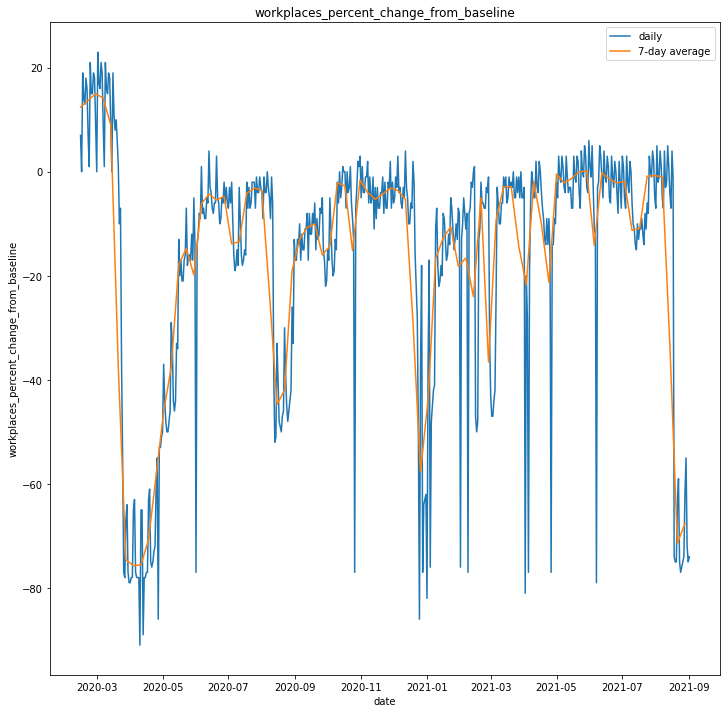

In [8]:
#Code to visualise the raw data and sampled data
fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('workplaces_percent_change_from_baseline')
sns.lineplot(data=df_province_selected, x='date', y='workplaces_percent_change_from_baseline', label='daily', ax=ax)
sns.lineplot(data=df_province_agg, x='date', y='workplaces_percent_change_from_baseline', label='7-day average', ax=ax)
plt.show()

## Identifying peaks

Let's focus on the 7-day averaged data. This averaged time series data shows how many times workplace changes reach peaks. Your task is to identify these moments. 

### 4. Identify peaks with personal code

Complete the function below. Your function should return (at least) a list of indexes where there are peaks in data.

In [9]:
def my_find_peaks(data, activity, **kwargs):
    """[summary]

    Args:
        data (dataframe): dataframe with at least two attribute columns: date and the given activity
        activity (str): one of the (six) available mobility activities
        kwargs: a dictionary of arguments. Use these to customise your function on finding peaks
    """
    # Select only the column from the dataset that correspond to the attribute
    for col in data.columns:
        if activity in col:
            include = data[activity]
            
    # Set up the dictionary of items
    for key,values in kwargs.items():
        include[key] = values
            
    # Determine the peaks and make a list with the indices of the peaks     
    peak_values = []
    peak_indices = []
    slope = 0 
    for value in range(1, len(include.values)):
        new_slope = include.values[value] - include.values[value-1] 
        if( slope > 0 and new_slope < 0 ):
            peak_values.append(include.values[value-1])
            peak_indices.append(value-1)
        slope = new_slope 
    return(peak_indices)           
    

In [10]:
activity = 'grocery_and_pharmacy_percent_change_from_baseline'
max_ind = my_find_peaks(
    df_province_agg, 
    activity
)
max_ind

[2, 4, 13, 15, 18, 23, 29, 36, 39, 44, 47, 53, 56, 65, 67, 72, 75, 77]

In [11]:
# Assign the data related to the max_ind to df_max
df_max = df_province_agg[[activity, 'date']].iloc[max_ind]

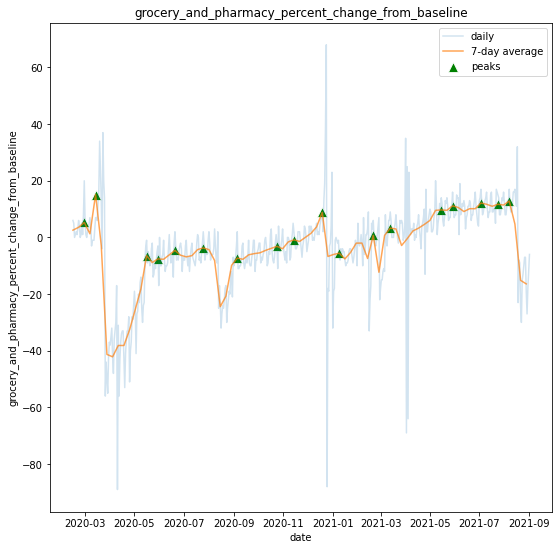

In [12]:
#Code to visualise the raw data, sampled data and the peaks
# create a figure and an axis to plot
fig, ax = plt.subplots(figsize=(9,9))
# set the title of the plot
ax.set_title(activity)
# plot the daily values
sns.lineplot(x='date', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
# plot the 7-day average
sns.lineplot(data=df_province_agg, x='date', y=activity, label='7-day average', ax=ax, alpha=0.7)
# label the peaks
sns.scatterplot(x='date', y=activity, data=df_max, label='peaks', ax=ax, marker='^', color='g', s=100)
plt.show()

### 5. Identify peaks using library scipy - [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

In [13]:
# Use find_peaks to determine the indices of the peaks
peaks, _ = find_peaks(df_province_agg[activity], height=5, distance=10)

# Print the indices of the peaks
print(peaks)

[ 4 44 67 77]


### 6. Identify valleys

You have identified the peaks in the data above using both your personal approach and the scipy library. Here, you can also identify the valleys (or troughs) using either of these approaches.

In [14]:
# Use find_peaks to determine the indices of the peaks
# Minus sign used since it concerns valleys
valleys, _ = find_peaks(-(df_province_agg[activity]), height=5, distance=10)

# Print the indices of the valleys
print(valleys)

[ 7 26 54]


### 7. Identify all the peaks (and potentially valleys) for all the activities in the data. Print out the peaks for each of the activities. 

If you are brave, you can make use of the plotting piece of code that is provided above to plot the results.

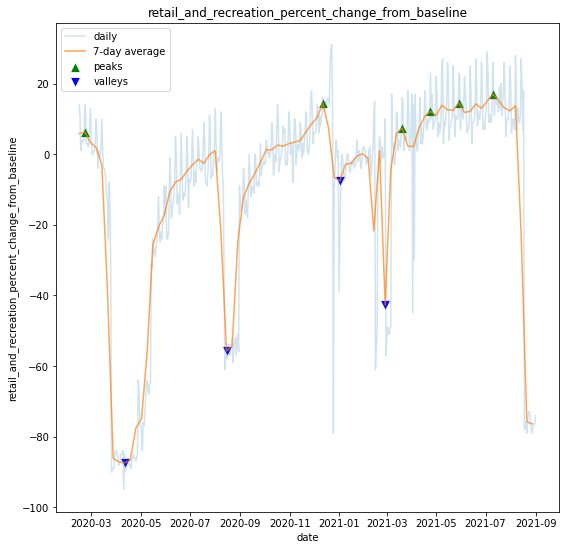

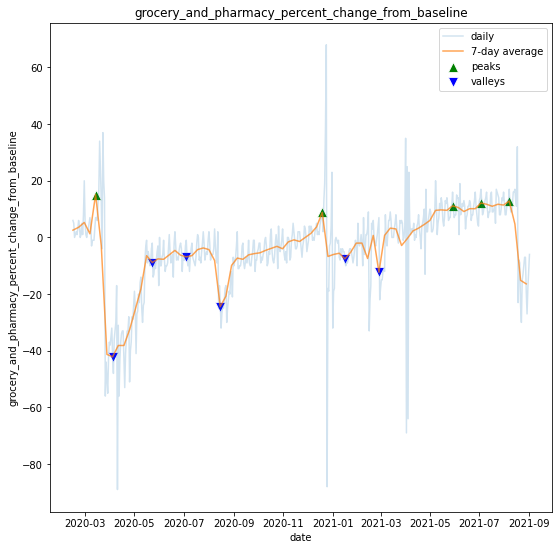

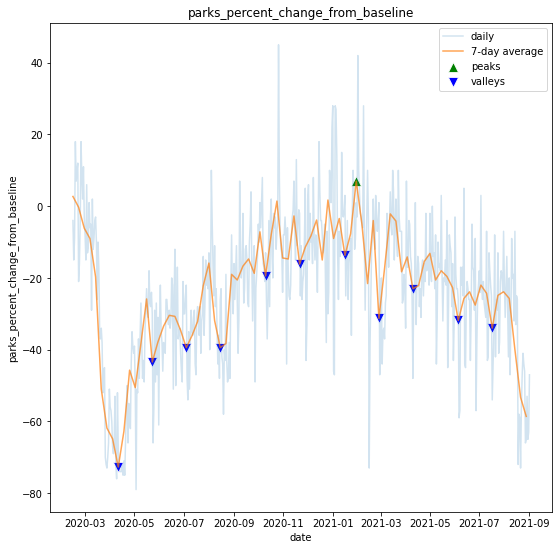

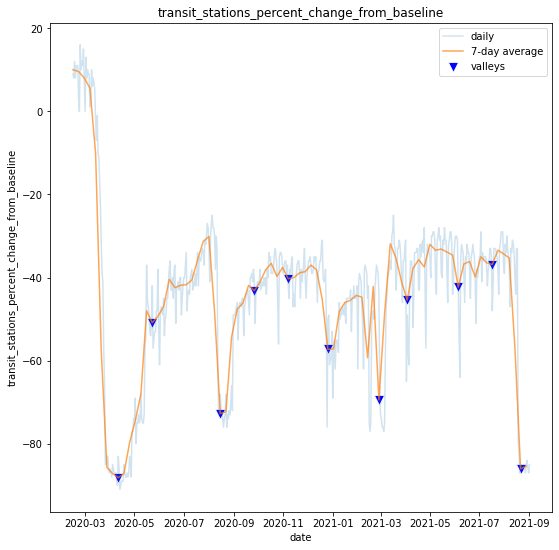

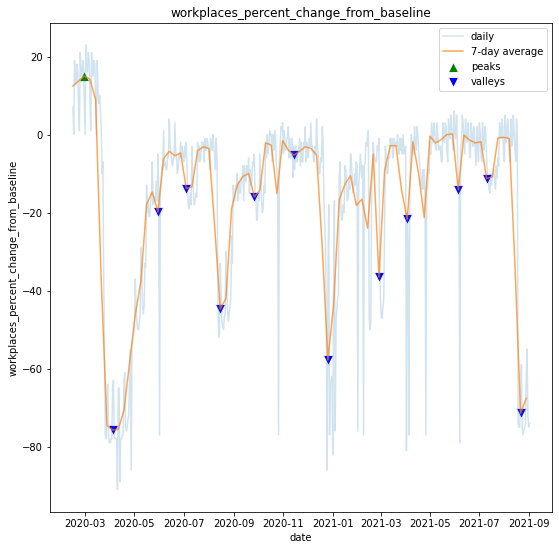

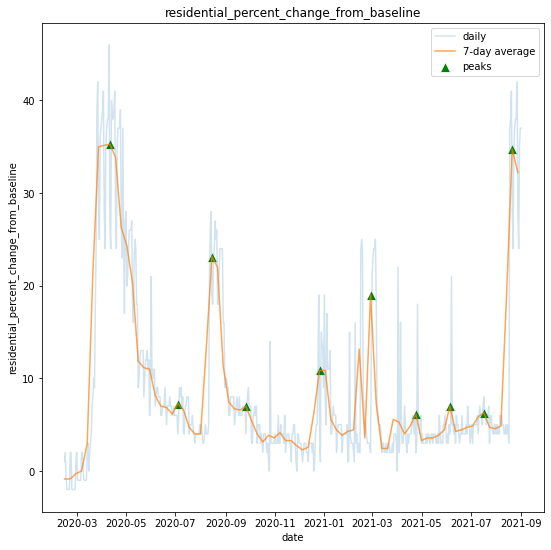

In [15]:
# retail_and_recreation_percent_change_from_baseline
activity_1 = 'retail_and_recreation_percent_change_from_baseline'
peaks_1, _ = find_peaks(df_province_agg[activity_1], height=5, distance=5)
valleys_1, _ = find_peaks(-(df_province_agg[activity_1]), height=5, distance=5)
df_max_1 = df_province_agg[[activity_1, 'date']].iloc[peaks_1]
df_min_1 = df_province_agg[[activity_1, 'date']].iloc[valleys_1]
fig, ax = plt.subplots(figsize=(9,9))
ax.set_title(activity_1)
sns.lineplot(x='date', y=activity_1, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
sns.lineplot(x='date', y=activity_1, data=df_province_agg, label='7-day average', ax=ax, alpha=0.7)
sns.scatterplot(x='date', y=activity_1, data=df_max_1, label='peaks', ax=ax, marker='^', color='g', s=100)
sns.scatterplot(x='date', y=activity_1, data=df_min_1, label='valleys', ax=ax, marker='v', color='b', s=100)
plt.show()

# grocery_and_pharmacy_percent_change_from_baseline
activity_2 = 'grocery_and_pharmacy_percent_change_from_baseline'
peaks_2, _ = find_peaks(df_province_agg[activity_2], height=5, distance=5)
valleys_2, _ = find_peaks(-(df_province_agg[activity_2]), height=5, distance=5)
df_max_2 = df_province_agg[[activity_2, 'date']].iloc[peaks_2]
df_min_2 = df_province_agg[[activity_2, 'date']].iloc[valleys_2]
fig, ax = plt.subplots(figsize=(9,9))
ax.set_title(activity_2)
sns.lineplot(x='date', y=activity_2, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
sns.lineplot(x='date', y=activity_2, data=df_province_agg, label='7-day average', ax=ax, alpha=0.7)
sns.scatterplot(x='date', y=activity_2, data=df_max_2, label='peaks', ax=ax, marker='^', color='g', s=100)
sns.scatterplot(x='date', y=activity_2, data=df_min_2, label='valleys', ax=ax, marker='v', color='b', s=100)
plt.show()

# parks_percent_change_from_baseline
activity_3 = 'parks_percent_change_from_baseline'
peaks_3, _ = find_peaks(df_province_agg[activity_3], height=5, distance=5)
valleys_3, _ = find_peaks(-(df_province_agg[activity_3]), height=5, distance=5)
df_max_3 = df_province_agg[[activity_3, 'date']].iloc[peaks_3]
df_min_3 = df_province_agg[[activity_3, 'date']].iloc[valleys_3]
fig, ax = plt.subplots(figsize=(9,9))
ax.set_title(activity_3)
sns.lineplot(x='date', y=activity_3, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
sns.lineplot(x='date', y=activity_3, data=df_province_agg, label='7-day average', ax=ax, alpha=0.7)
sns.scatterplot(x='date', y=activity_3, data=df_max_3, label='peaks', ax=ax, marker='^', color='g', s=100)
sns.scatterplot(x='date', y=activity_3, data=df_min_3, label='valleys', ax=ax, marker='v', color='b', s=100)
plt.show()

# transit_stations_percent_change_from_baseline
activity_4 = 'transit_stations_percent_change_from_baseline'
peaks_4, _ = find_peaks(df_province_agg[activity_4], height=5, distance=5)
valleys_4, _ = find_peaks(-(df_province_agg[activity_4]), height=5, distance=5)
df_max_4 = df_province_agg[[activity_4, 'date']].iloc[peaks_4]
df_min_4 = df_province_agg[[activity_4, 'date']].iloc[valleys_4]
fig, ax = plt.subplots(figsize=(9,9))
ax.set_title(activity_4)
sns.lineplot(x='date', y=activity_4, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
sns.lineplot(x='date', y=activity_4, data=df_province_agg, label='7-day average', ax=ax, alpha=0.7)
sns.scatterplot(x='date', y=activity_4, data=df_max_4, label='peaks', ax=ax, marker='^', color='g', s=100)
sns.scatterplot(x='date', y=activity_4, data=df_min_4, label='valleys', ax=ax, marker='v', color='b', s=100)
plt.show()

# workplaces_percent_change_from_baseline
activity_5 = 'workplaces_percent_change_from_baseline'
peaks_5, _ = find_peaks(df_province_agg[activity_5], height=5, distance=5)
valleys_5, _ = find_peaks(-(df_province_agg[activity_5]), height=5, distance=5)
df_max_5 = df_province_agg[[activity_5, 'date']].iloc[peaks_5]
df_min_5 = df_province_agg[[activity_5, 'date']].iloc[valleys_5]
fig, ax = plt.subplots(figsize=(9,9))
ax.set_title(activity_5)
sns.lineplot(x='date', y=activity_5, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
sns.lineplot(x='date', y=activity_5, data=df_province_agg, label='7-day average', ax=ax, alpha=0.7)
sns.scatterplot(x='date', y=activity_5, data=df_max_5, label='peaks', ax=ax, marker='^', color='g', s=100)
sns.scatterplot(x='date', y=activity_5, data=df_min_5, label='valleys', ax=ax, marker='v', color='b', s=100)
plt.show()

# residential_percent_change_from_baseline
activity_6 = 'residential_percent_change_from_baseline'
peaks_6, _ = find_peaks(df_province_agg[activity_6], height=5, distance=5)
valleys_6, _ = find_peaks(-(df_province_agg[activity_6]), height=5, distance=5)
df_max_6 = df_province_agg[[activity_6, 'date']].iloc[peaks_6]
df_min_6 = df_province_agg[[activity_6, 'date']].iloc[valleys_6]
fig, ax = plt.subplots(figsize=(9,9))
ax.set_title(activity_6)
sns.lineplot(x='date', y=activity_6, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
sns.lineplot(x='date', y=activity_6, data=df_province_agg, label='7-day average', ax=ax, alpha=0.7)
sns.scatterplot(x='date', y=activity_6, data=df_max_6, label='peaks', ax=ax, marker='^', color='g', s=100)
sns.scatterplot(x='date', y=activity_6, data=df_min_6, label='valleys', ax=ax, marker='v', color='b', s=100)
plt.show()


### 8. Is there any common dates (or periods) among these peaks (and/or valleys) of different activities

*Food for thoughts*:
- One of the most naive way to find the overlapping dates is to look for common indexes (or dates) of the peaks/valleys
- A more general solution is to have a tolerance level between the days. For example, Sep 19 and Sep 20 can be considered matched (or overlapped) if the tolerance level is at least one day.

In [16]:
# I did not understand how to implement the general solution described above, so I did use the 'naive' way to 
# find overlapping dates by looking for common dates.

# Common dates for peaks
# 1. Merge all dataframes into one dataframe with date as an index
df_max_all = df_max_1.merge(df_max_2, how='outer', on=['date']).merge(df_max_3, how='outer', on=['date']).merge(df_max_4, how='outer', on=['date']).merge(df_max_5, how='outer', on=['date']).merge(df_max_6, how='outer', on=['date'])
# 2. Make the date column the first column
df_max_all = df_max_all[ ['date'] + [ col for col in df_max_all.columns if col != 'date' ] ]
# 3. Sort all values by date
df_max_all = df_max_all.sort_values('date')
# 4. Drop all rows that have at least three values that are not NaN.
# This operation results in the selection of only rows that have a date and at least two values in the activity columns,
# meaning that this is a common date for at least two peaks
df_max_all = df_max_all.dropna(thresh=3)
# Display the dataframe.
# Displaying this dataframe without print did not work, although the same code was used for the valleys (see below) and 
# that dataframe did display. I could not figure out what the error was. 
print(df_max_all)

# Common dates for valleys
# 1. Merge all dataframes into one dataframe with date as an index
df_min_all = df_min_1.merge(df_min_2, how='outer', on=['date']).merge(df_min_3, how='outer', on=['date']).merge(df_min_4, how='outer', on=['date']).merge(df_min_5, how='outer', on=['date']).merge(df_min_6, how='outer', on=['date'])
# 2. Make the date column the first column
df_min_all = df_min_all.sort_values('date')
# 3. Sort all values by date
df_min_all = df_min_all[ ['date'] + [ col for col in df_min_all.columns if col != 'date' ] ]
# 4. Drop all rows that have at least three values that are not NaN.
# This operation results in the selection of only rows that have a date and at least two values in the activity columns,
# meaning that this is a common date for at least two valleys
df_min_all = df_min_all.dropna(thresh=3)
# Display the dataframe.
df_min_all

        date  retail_and_recreation_percent_change_from_baseline  \
3 2021-04-24                                          12.142857    
4 2021-05-29                                          14.571429    

   grocery_and_pharmacy_percent_change_from_baseline  \
3                                                NaN   
4                                          11.142857   

   parks_percent_change_from_baseline  \
3                                 NaN   
4                                 NaN   

   transit_stations_percent_change_from_baseline  \
3                                            NaN   
4                                            NaN   

   workplaces_percent_change_from_baseline  \
3                                      NaN   
4                                      NaN   

   residential_percent_change_from_baseline  
3                                  6.142857  
4                                       NaN  


,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
4,2020-04-04,NaN,-42.142857,NaN,NaN,-75.714286,NaN
0,2020-04-11,-87.428571,NaN,-72.714286,-88.142857,NaN,NaN
5,2020-05-23,NaN,-8.857143,-43.428571,-50.857143,NaN,NaN
6,2020-07-04,NaN,-6.857143,-39.428571,NaN,-13.857143,NaN
1,2020-08-15,-55.714286,-24.428571,-39.428571,-72.714286,-44.714286,NaN
13,2020-09-26,NaN,NaN,NaN,-43.142857,-16.000000,NaN
15,2020-12-26,NaN,NaN,NaN,-57.285714,-57.714286,NaN
7,2021-01-16,NaN,-7.571429,-13.714286,NaN,NaN,NaN
3,2021-02-27,-42.714286,-12.285714,-31.285714,-69.428571,-36.571429,NaN
16,2021-04-03,NaN,NaN,NaN,-45.428571,-21.714286,NaN


## OPTIONAL

Append population/density for provinces/municipalities to the dataframe. The data for Netherlands is available [here](https://www.cbs.nl/en-gb/news/2021/30/population-growth-picks-up-again)


In [145]:
# YOUR CODE HERE
